In [20]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
# Create a set of random lattitude and longitude combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)

# Zip lists; creates iterator of tuples
# Recall tuples are used to store multiple items in a single variable
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the lattitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [23]:
# GENERATE RANDOM WORLD CITIES 
# Install citipy using pip install citipy
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [39]:
#Create a list to hold cities 
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities: 
        cities.append(city)
        
len(cities)
cities[0]

'puerto ayora'

In [28]:
# Documentation https://openweathermap.org/current
import requests
requests.__version__


'2.25.1'

In [37]:
import requests
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [32]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [44]:
# Create an empty list to hold the weather data 
city_data = []

# Print the beggining of logged data 
print("Beginning Data Retrieval")
print("-"*30)

# Create the counters 
record_count = 1
set_count = 1

# Loop through all the cities in our list usine enumerate() method 

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count 
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | barra patuca
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | montepuez
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | kiunga
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | seoul
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | toliary
City not found. Skipping...
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | halalo
City not found. Skipping...
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | port augusta
Processing Record 21 

In [45]:
len(city_data)

568

In [46]:
# Convert the array of dictionarues in city_data[] to a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,75.16,88,90,5.99,EC,2021-10-27 18:46:49
1,Barra Patuca,15.8000,-84.2833,85.80,69,99,11.32,HN,2021-10-27 18:46:50
2,Busselton,-33.6500,115.3333,47.05,80,47,8.79,AU,2021-10-27 18:46:50
3,Montepuez,-13.1256,38.9997,77.11,64,52,7.02,MZ,2021-10-27 18:46:51
4,New Norfolk,-42.7826,147.0587,56.70,68,2,3.65,AU,2021-10-27 18:46:51
5,Mar Del Plata,-38.0023,-57.5575,75.22,89,0,8.01,AR,2021-10-27 18:42:03
6,Kiunga,-6.1219,141.2906,73.81,100,100,1.45,PG,2021-10-27 18:46:52
7,Chuy,-33.6971,-53.4616,79.97,51,0,7.54,UY,2021-10-27 18:46:52
8,Guerrero Negro,27.9769,-114.0611,78.15,30,0,3.18,MX,2021-10-27 18:46:53
9,Seoul,37.5683,126.9778,45.84,81,0,1.14,KR,2021-10-27 18:45:31


In [48]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-10-27 18:46:49,-0.7393,-90.3518,75.16,88,90,5.99
1,Barra Patuca,HN,2021-10-27 18:46:50,15.8000,-84.2833,85.80,69,99,11.32
2,Busselton,AU,2021-10-27 18:46:50,-33.6500,115.3333,47.05,80,47,8.79
3,Montepuez,MZ,2021-10-27 18:46:51,-13.1256,38.9997,77.11,64,52,7.02
4,New Norfolk,AU,2021-10-27 18:46:51,-42.7826,147.0587,56.70,68,2,3.65
5,Mar Del Plata,AR,2021-10-27 18:42:03,-38.0023,-57.5575,75.22,89,0,8.01
6,Kiunga,PG,2021-10-27 18:46:52,-6.1219,141.2906,73.81,100,100,1.45
7,Chuy,UY,2021-10-27 18:46:52,-33.6971,-53.4616,79.97,51,0,7.54
8,Guerrero Negro,MX,2021-10-27 18:46:53,27.9769,-114.0611,78.15,30,0,3.18
9,Seoul,KR,2021-10-27 18:45:31,37.5683,126.9778,45.84,81,0,1.14


In [49]:
# Create output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export 
city_data_df.to_csv(output_data_file, index_label="City ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


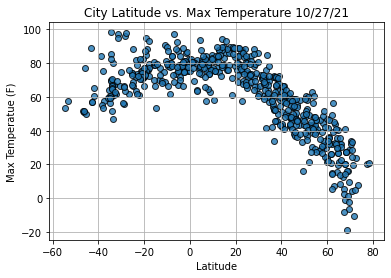

In [56]:
# Import time module
import time 

# Build scatter plot for lattitude vs. max temp 
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperatue (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

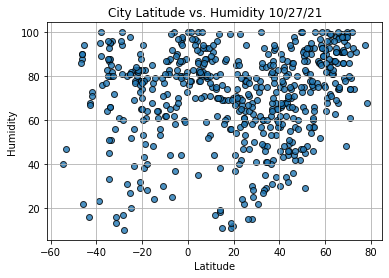

In [58]:
# Build scatter plot for lattitude vs. humidity 
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

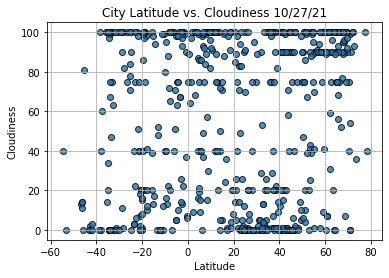

In [59]:
# Build scatter plot for lattitude vs. cloudiness 
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

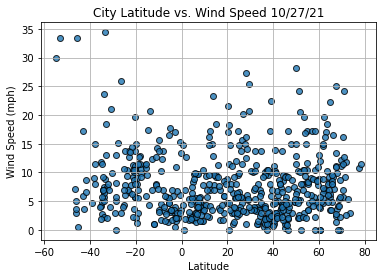

In [61]:
# Build scatter plot for lattitude vs. wind speed 
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker = "o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()